In [187]:
%load_ext watermark
%watermark
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2020-03-30T00:02:25-05:00

CPython 3.7.3
IPython 7.8.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-91-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [96]:
#Vehicules information Dataframe 
df = pd.read_csv("vehiculos_procesado.csv", usecols=["consumo", "co2", "cilindros", "desplazamiento"])
# Consumo: millas por galón
# Se desea convertir a: litros por milla ----> 1 galón = 3.78541 L
df["Consume_liter_mile"] = 3.78541/df["consumo"]
df
# CO2 BECOME OUR OBJECTIVE VARIABLE

desplazamiento  cilindros  consumo         co2  Consume_liter_mile
0                 2.5        4.0       17  522.764706            0.222671
1                 4.2        6.0       13  683.615385            0.291185
2                 2.5        4.0       16  555.437500            0.236588
3                 4.2        6.0       13  683.615385            0.291185
4                 3.8        6.0       16  555.437500            0.236588
5                 2.2        4.0       22  403.954545            0.172064
6                 2.2        4.0       24  370.291667            0.157725
7                 3.0        6.0       20  444.350000            0.189271
8                 2.3        4.0       22  403.954545            0.172064
9                 2.3        4.0       24  370.291667            0.157725
10                3.0        6.0       20  444.350000            0.189271
11                2.3        4.0       22  403.954545            0.172064
12                2.3        4.0       24  370.291667            0.157725
13                3.0        6.0       20  444.350000            0.189271
14                2.5        5.0       20  444.350000            0.189271
15                2.5        5.0       20  444.350000            0.189271
16                3.2        6.0       19  467.736842            0.199232
17                2.5        5.0       20  444.350000            0.189271
18                3.2        6.0       19  467.736842            0.199232
19                2.5        5.0       20  444.350000            0.189271
20                3.2        6.0       19  467.736842            0.199232
21                3.2        6.0       20  444.350000            0.189271
22                3.2        6.0       21  423.190476            0.180258
23                3.2        6.0       20  444.350000            0.189271
24                3.2        6.0       21  423.190476            0.180258
25                3.2        6.0       20  444.350000            0.189271
26                3.2        6.0       20  444.350000            0.189271
27                3.2        6.0       20  444.350000            0.189271
28                3.2        6.0       21  423.190476            0.180258
29                3.2        6.0       21  423.190476            0.180258
...               ...        ...      ...         ...                 ...
35509             2.9        6.0       15  592.466667            0.252361
35510             2.9        6.0       15  592.466667            0.252361
35511             2.9        6.0       12  740.583333            0.315451
35512             2.9        6.0       15  592.466667            0.252361
35513             2.9        6.0       15  592.466667            0.252361
35514             2.9        6.0       15  592.466667            0.252361
35515             2.9        6.0       15  592.466667            0.252361
35516             5.6        8.0       13  683.615385            0.291185
35517             5.6        8.0       13  683.615385            0.291185
35518             5.6        8.0       13  683.615385            0.291185
35519             5.6        8.0       13  683.615385            0.291185
35520             5.6        8.0       13  683.615385            0.291185
35521             5.6        8.0       13  683.615385            0.291185
35522             5.6        8.0       13  683.615385            0.291185
35523             5.6        8.0       13  683.615385            0.291185
35524             5.6        8.0       13  683.615385            0.291185
35525             5.6        8.0       13  683.615385            0.291185
35526             5.6        8.0       13  683.615385            0.291185
35527             5.6        8.0       13  683.615385            0.291185
35528             6.0       12.0       12  740.583333            0.315451
35529             5.0       12.0       13  683.615385            0.291185
35530             5.0       12.0       13  683.615385            0.291185
35531      

El modelo de regresión lineal mediante OLS (ordinary least squares) tiene la forma:

$$ \hat{y} = \alpha + \beta_{1}*x_{1} + \beta_{2}*x_{2} + ... + \beta_{n}*x_{n} + \varepsilon$$

Donde $\hat{y}$ es la predicción que queremos hacer,

$\alpha$ es el término independiente,

$\beta_{n}$ es un vector de coeficientes
y $x_{n}$ son los valores de las variables del dataset.

El objetivo es obtener $\alpha$ y $\beta_{n}$  tales que error cuadrático (residuo) , definido como:

$$RSS = \varepsilon² = \sum\limits_{i=1}^n(y_{i} - (\alpha - \beta_{i}x_{i}))^2$$

sea el mínimo.

Para ello tenemos que resolver las siguientes equaciones

$$\hat{\alpha} = \bar{y} - \hat{\beta}*\bar{x}$$
$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

Para obtener los coeficientes del modelo dedicamos una fracción del dataset a entrenar y otra a evaluar los resultados (para evitar sobreajuste o sobregeneralización)

In [97]:
pct_training = 0.8
#df_test = df.head(round(pct_test*df.shape[0])) That's how I tried it
df_training = df.sample(frac=pct_training) #That's how I should do it
df_test = df[~df.index.isin(df_training.index)]
df_test

desplazamiento  cilindros  consumo         co2  Consume_liter_mile
6                 2.2        4.0       24  370.291667            0.157725
10                3.0        6.0       20  444.350000            0.189271
11                2.3        4.0       22  403.954545            0.172064
13                3.0        6.0       20  444.350000            0.189271
19                2.5        5.0       20  444.350000            0.189271
26                3.2        6.0       20  444.350000            0.189271
52                1.6        4.0       25  355.480000            0.151416
56                1.8        4.0       23  386.391304            0.164583
63                1.8        4.0       23  386.391304            0.164583
64                1.8        4.0       25  355.480000            0.151416
70                1.8        4.0       25  355.480000            0.151416
84                1.8        4.0       24  370.291667            0.157725
86                1.8        4.0       23  386.391304            0.164583
92                2.5        6.0       20  444.350000            0.189271
98                2.7        6.0       19  467.736842            0.199232
119               3.5        6.0       23  390.000000            0.164583
120               3.5        6.0       23  390.000000            0.164583
124               3.5        6.0       17  522.764706            0.222671
129               3.7        6.0       17  522.764706            0.222671
134               3.5        6.0       21  418.000000            0.180258
137               3.5        6.0       21  415.000000            0.180258
141               3.5        6.0       22  404.000000            0.172064
143               3.0        6.0       18  493.722222            0.210301
146               3.0        6.0       19  467.736842            0.199232
148               3.0        6.0       19  467.736842            0.199232
164               3.2        6.0       18  493.722222            0.210301
178               3.5        6.0       23  386.000000            0.164583
194               3.5        6.0       19  467.736842            0.199232
197               3.7        6.0       18  493.722222            0.210301
212               2.0        4.0       24  370.291667            0.157725
...               ...        ...      ...         ...                 ...
35364             2.4        5.0       21  423.190476            0.180258
35372             2.4        5.0       21  423.190476            0.180258
35375             2.4        5.0       22  403.954545            0.172064
35379             3.2        6.0       19  467.736842            0.199232
35381             3.2        6.0       21  423.190476            0.180258
35386             2.5        5.0       19  467.736842            0.199232
35387             2.5        5.0       18  493.722222            0.210301
35389             2.5        5.0       18  493.722222            0.210301
35390             2.4        5.0       18  493.722222            0.210301
35395             2.0        4.0       25  361.000000            0.151416
35396             2.0        4.0       26  344.000000            0.145593
35397             2.0        4.0       27  322.000000            0.140200
35426             2.0        4.0       26  346.000000            0.145593
35427             2.0        4.0       24  364.000000            0.157725
35428             2.0        4.0       26  348.000000            0.145593
35431             2.5        5.0       19  467.736842            0.199232
35437             3.0        6.0       18  493.722222            0.210301
35442             3.2        6.0       20  444.350000            0.189271
35451             3.2        6.0       21  423.190476            0.180258
35467             4.4        8.0       15  592.466667            0.252361
35468             3.2        6.0       16  555.437500            0.236588
35483             2.0        4.0       23  394.000000            0.164583
35493      

In [176]:
#Now I define two lists: One with the name od the independent variables X and another with de dependet variable Y
independent_variables = ["Consume_liter_mile", "desplazamiento", "cilindros"] # Matriz Nx3
dependent_variables = "co2" # Vector Nx1
#Creating my arrays
X = df_training[independent_variables].to_numpy()
Y = df_training[dependent_variables].to_numpy()
betas = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ Y  #This is nympy nomenclature

In [177]:
alpha = Y.mean() - (betas @ df_training[independent_variables].mean().to_numpy())
alpha

0.35978037668718343

In [179]:
def prediction(r):
    return alpha + betas @ r.to_numpy()

In [189]:
df_training["co2_pred"] = df_training[independent_variables].apply(prediction, axis=1) #Apply a function to each row or column
df_test["co2_pred"] = df_test[independent_variables].apply(prediction, axis=1)
df_test.head()

/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


desplazamiento  cilindros  consumo         co2  Consume_liter_mile  \
6              2.2        4.0       24  370.291667            0.157725   
10             3.0        6.0       20  444.350000            0.189271   
11             2.3        4.0       22  403.954545            0.172064   
13             3.0        6.0       20  444.350000            0.189271   
19             2.5        5.0       20  444.350000            0.189271   

      co2_pred  
6   369.987366  
10  444.607531  
11  403.412526  
13  444.607531  
19  443.299312

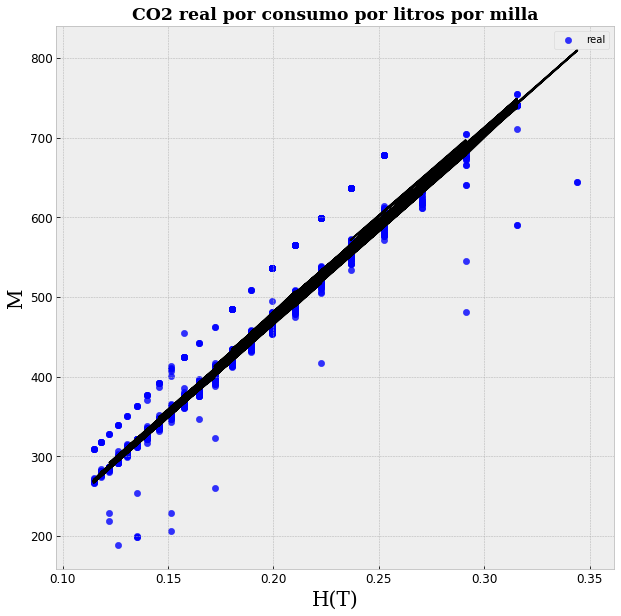

In [215]:
plt.style.use("bmh")
ax = df_test.plot.scatter(x='Consume_liter_mile',y='co2',alpha=0.8, figsize=(10,10), fontsize=12, s=40, label="real")
ax.set_title('CO2 real por consumo por litros por milla', size="xx-large", family="serif", weight= "semibold")
plt.plot(df_test.Consume_liter_mile, df_test.co2_pred, c="black", label="Prediction")
plt.xlabel('H(T)', fontsize= 20, color="#000000", family="serif")
plt.ylabel('M', fontsize= 20, color="#000000", family="serif")
plt.show()

In [217]:
def mse(y, y_pred):
    return np.sum((y-y_pred)**2)/len(y)

In [222]:
error_training = mse(df_training["co2"], df_training["co2_pred"])